 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [118]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [119]:
# Reading whale returns
whale_csv_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [120]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [121]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [122]:
# Reading algorithmic returns
algo_csv_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [123]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [124]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


# S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

##### Reading S&P 500 Closing Prices


In [125]:
# Check Data Types
sp500_csv_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [126]:
sp500_df.dtypes

Close    object
dtype: object

In [127]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','', regex=True)
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [128]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [129]:
# Drop nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [130]:
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [131]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['SP500']

# Combine Whale, Algorithmic, and S&P 500 Returns

In [132]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis ='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

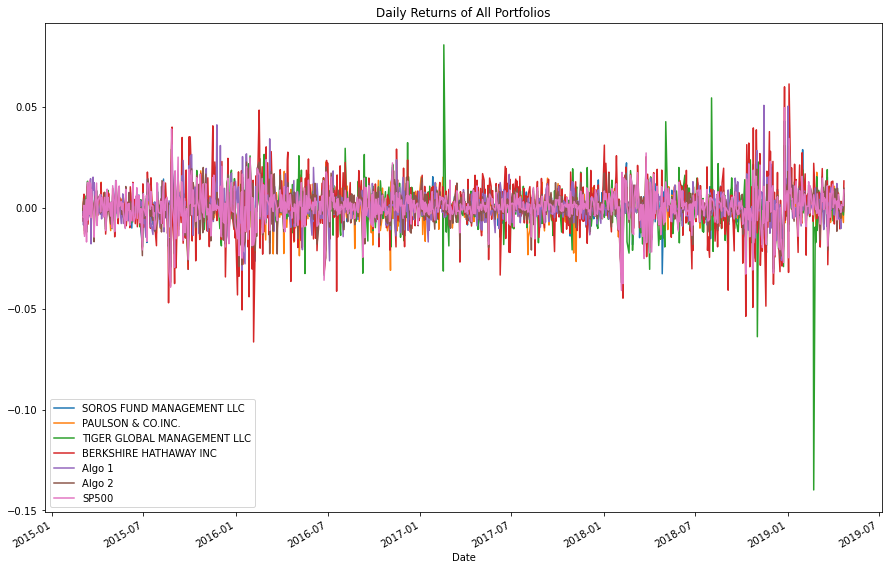

In [133]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(15,10), title="Daily Returns of All Portfolios")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

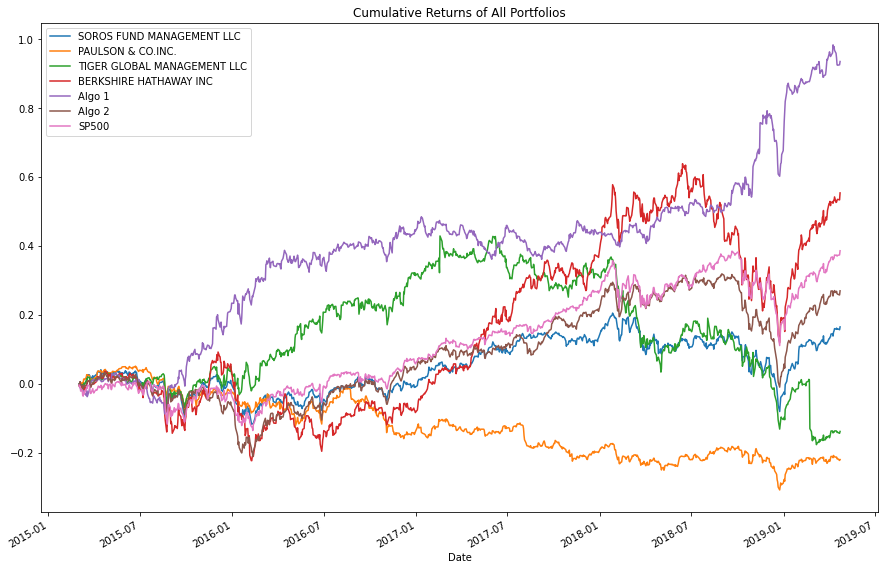

In [134]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title="Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios in a Box Plot'}>

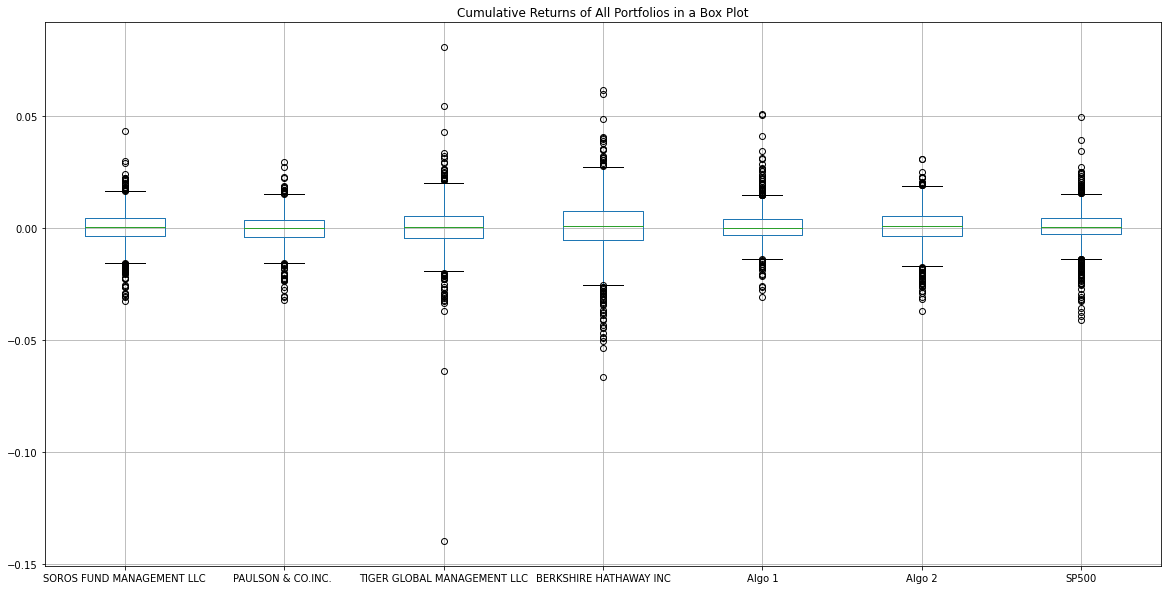

In [135]:
# Box plot to visually show risk
combined_df.plot(kind='box', figsize=(20,10), grid=True, title="Cumulative Returns of All Portfolios in a Box Plot")

### Calculate Standard Deviations

In [136]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [137]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
combined_std = combined_std.sort_values(ascending=False)
combined_std
#Berkshire Hathaway INC and Tiger Global Management LLC are riskier than the S&P500

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [138]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Stadnard Deviation for 21 Days'}, xlabel='Date'>

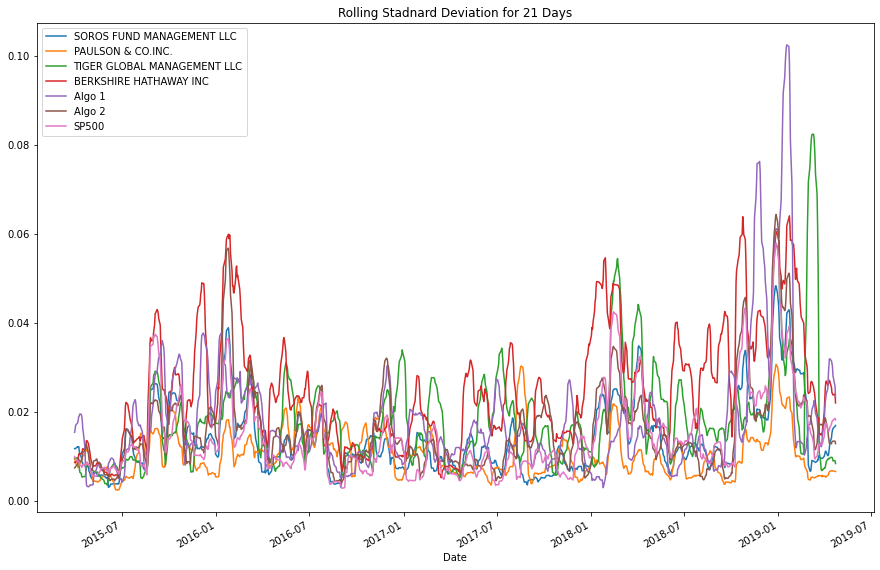

In [139]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumulative_returns.rolling(window=21).std()
rolling_std

# Plot the rolling standard deviation
rolling_std.plot(figsize=(15,10), title='Rolling Stadnard Deviation for 21 Days')

### Calculate and plot the correlation

<AxesSubplot:>

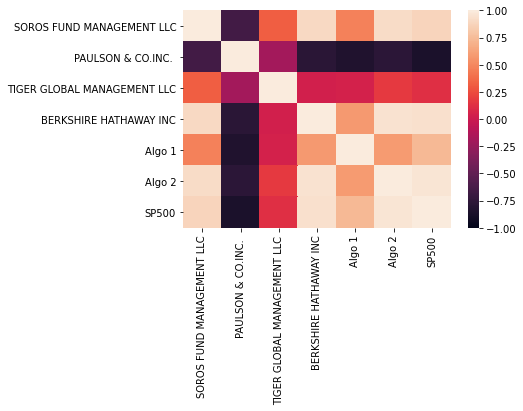

In [140]:
# Calculate the correlation
correlation = cumulative_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin =-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT Rolling 60-Day Beta'}, xlabel='Date'>

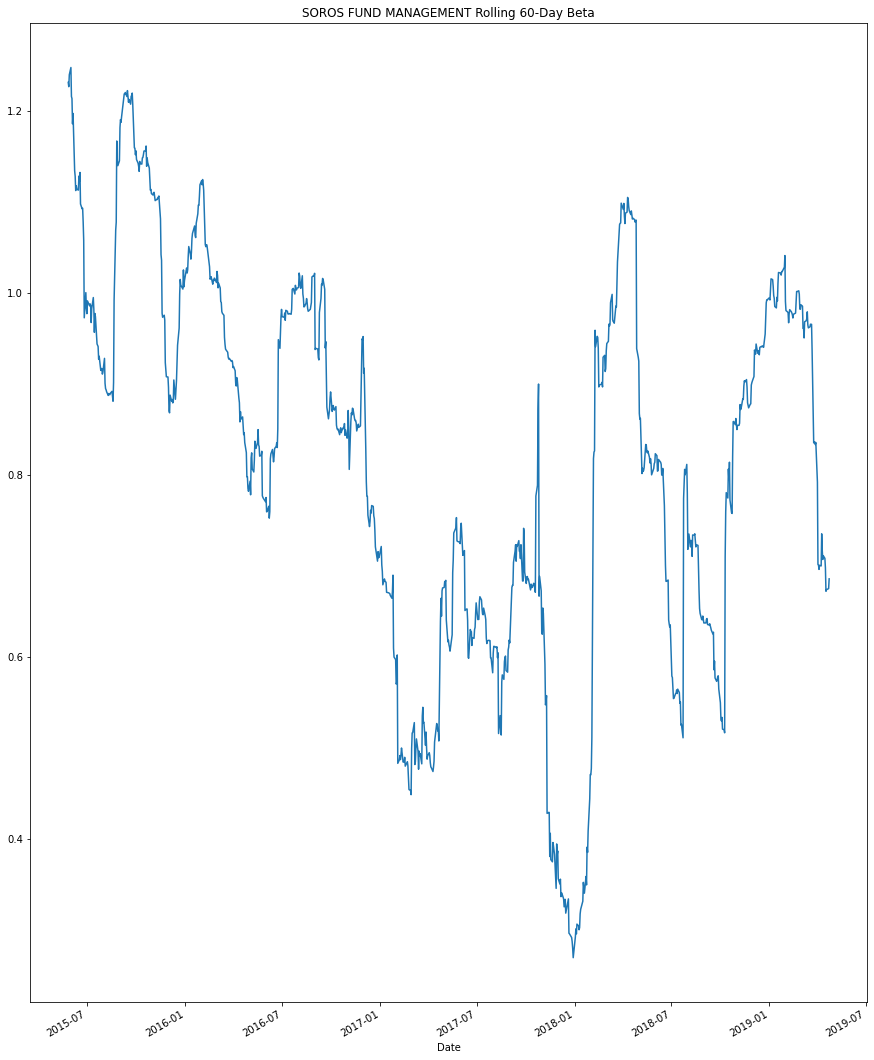

In [141]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['SP500'])
covariance
# Calculate variance of S&P 500
variance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).var()
variance
# Computing beta
soros_beta = covariance / variance
soros_beta
# Plot beta trend
soros_beta.plot(figsize=(15,20), title='SOROS FUND MANAGEMENT Rolling 60-Day Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average with 21 Day Half-life'}, xlabel='Date'>

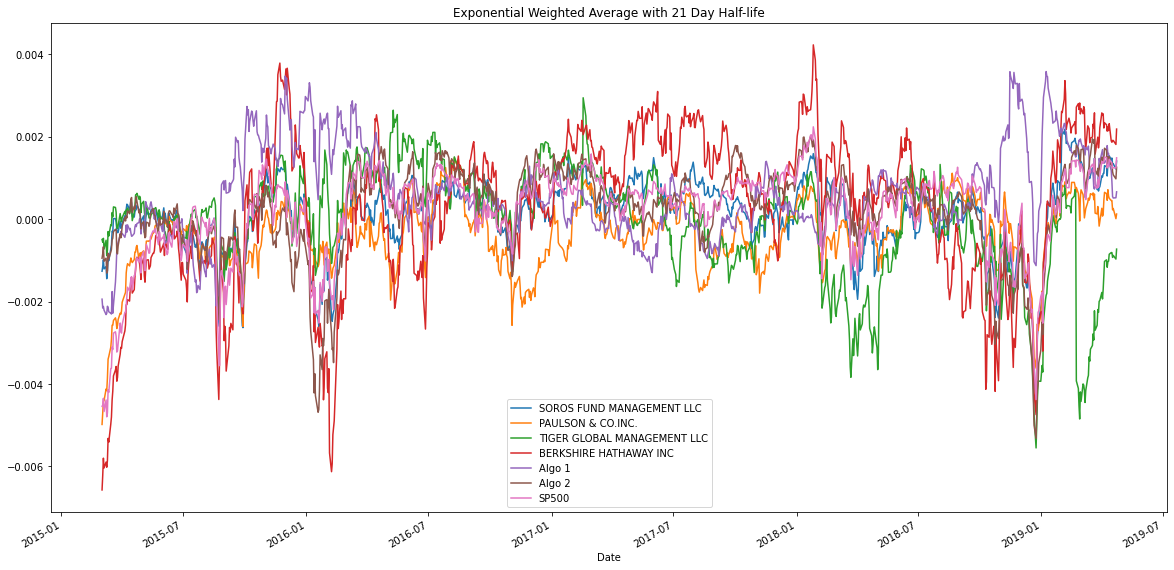

In [347]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21, adjust=False).mean().plot(figsize=(20,10), title='Exponential Weighted Average with 21 Day Half-life')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [335]:
# Annualized Sharpe Ratios
sharpe_ratio = combined_df.mean() * 252 / (combined_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

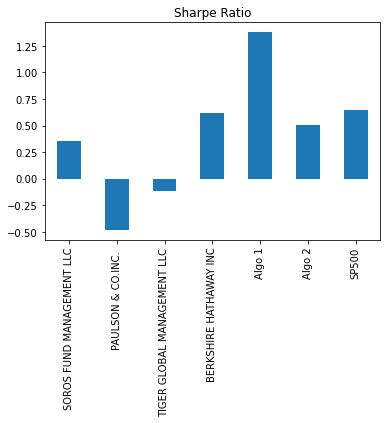

In [116]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title = 'Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

### Algo 1 outperforms both S&P500 and the whales portfolios. Algo 2 outperforms Soros, Tiger and Paulson but underperforms against S&P 500 and Berkshire Hathaway.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [278]:
tsla_csv_path = Path("../Starter_Code/Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_df.sort_index(inplace=True)
tsla_df.columns = ['tsla']
tsla_df.head()


,tsla
Date,
2015-01-02 16:00:00,43.86
2015-01-05 16:00:00,42.02
2015-01-06 16:00:00,42.26
2015-01-07 16:00:00,42.19
2015-01-08 16:00:00,42.12


In [245]:
# Reading data from 2nd stock
nvda_csv_path = Path("../Starter_Code/Resources/nvda_historical.csv")
nvda_df = pd.read_csv(nvda_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
nvda_df.sort_index(inplace=True)
nvda_df.columns = ['nvda']
nvda_df.head()

,nvda
Date,
2015-01-02 16:00:00,5.03
2015-01-05 16:00:00,4.95
2015-01-06 16:00:00,4.80
2015-01-07 16:00:00,4.78
2015-01-08 16:00:00,4.97


In [246]:
# Reading data from 3rd stock
sq_csv_path = Path("../Starter_Code/Resources/sq_historical.csv")
sq_df = pd.read_csv(sq_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sq_df.sort_index(inplace=True)
sq_df.columns = ['sq']
sq_df.head()

,sq
Date,
2015-11-19 16:00:00,13.07
2015-11-20 16:00:00,12.85
2015-11-23 16:00:00,12.12
2015-11-24 16:00:00,12.02
2015-11-25 16:00:00,11.90


In [247]:
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol
combined_stocks = pd.concat([tsla_df, nvda_df, sq_df], axis='columns', join='inner')
combined_stocks.head()


,tsla,nvda,sq
Date,,,
2015-11-19 16:00:00,44.36,7.78,13.07
2015-11-20 16:00:00,44.00,7.85,12.85
2015-11-23 16:00:00,43.55,7.73,12.12
2015-11-24 16:00:00,43.65,7.79,12.02
2015-11-25 16:00:00,45.93,7.78,11.90


<AxesSubplot:title={'center':'Daily Returns of Stocks'}, xlabel='Date'>

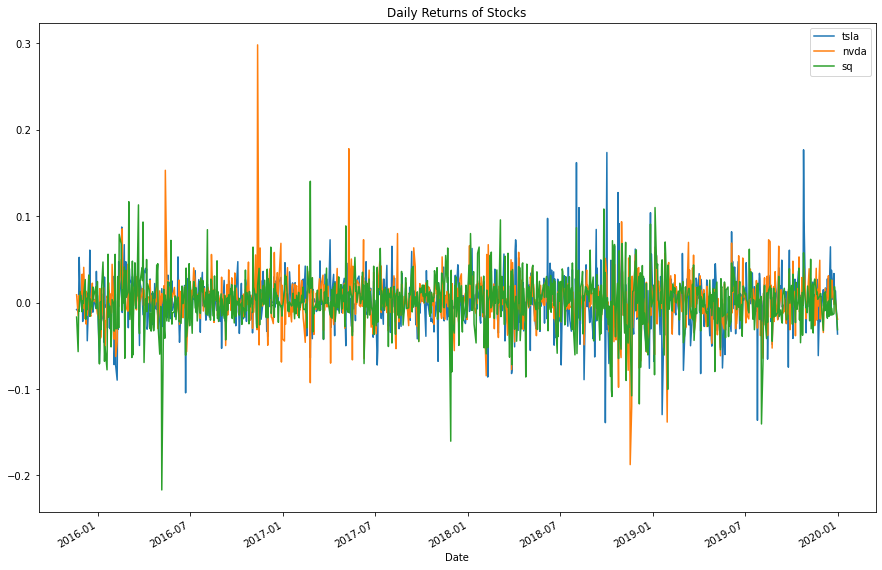

In [248]:
# Calculate daily returns
daily_returns_stocks = combined_stocks.pct_change()
daily_returns_stocks
# Drop NAs
daily_returns_stocks.dropna(inplace=True)
daily_returns_stocks.isnull().sum()
# Display sample data
daily_returns_stocks.plot(figsize=(15,10), title='Daily Returns of Stocks')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [284]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns_stocks.dot(weights)
# Display sample data
portfolio_df = pd.DataFrame(portfolio_returns)
portfolio_df.rename(columns={0: 'Custom Portfolio'}, inplace=True)
portfolio_df.index = portfolio_df.index.normalize()
portfolio_df.head()

,Custom Portfolio
Date,
2015-11-20,-0.005317
2015-11-23,-0.027441
2015-11-24,0.000602
2015-11-25,0.013656
2015-11-27,0.010031


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [305]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([portfolio_df, combined_df], axis='columns', join='inner')
combined_portfolios.rename(columns={0 : "Custom Portfolio"}, inplace=True)
combined_portfolios.sort_index()
combined_portfolios.head()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2015-11-20,-0.005317,0.005784,0.006760,0.003272,0.022681,-0.000583,0.000913,0.003810
2015-11-23,-0.027441,-0.001089,-0.003781,0.003151,0.012117,0.012757,0.002214,-0.001235
2015-11-24,0.000602,0.003382,0.006359,0.003376,-0.006365,0.041067,0.007598,0.001222
2015-11-25,0.013656,0.002190,0.004682,0.001628,0.000008,-0.000418,0.004740,-0.000129
2015-11-27,0.010031,-0.000389,0.000004,0.001180,0.004219,0.001387,0.003810,0.000594


In [306]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.dropna(inplace=True)
combined_portfolios.tail()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2019-04-16,0.010943,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.007501,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.008505,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.000274,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.004753,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [307]:
# Calculate the annualized `std`
combined_port_std = combined_portfolios.std()
combined_annualized_std = combined_port_std * np.sqrt(252)
combined_annualized_std

Custom Portfolio               0.343209
SOROS FUND MANAGEMENT LLC      0.124896
PAULSON & CO.INC.              0.114686
TIGER GLOBAL MANAGEMENT LLC    0.181718
BERKSHIRE HATHAWAY INC         0.206202
Algo 1                         0.119186
Algo 2                         0.131413
SP500                          0.130799
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD with 21 Day Window'}, xlabel='Date'>

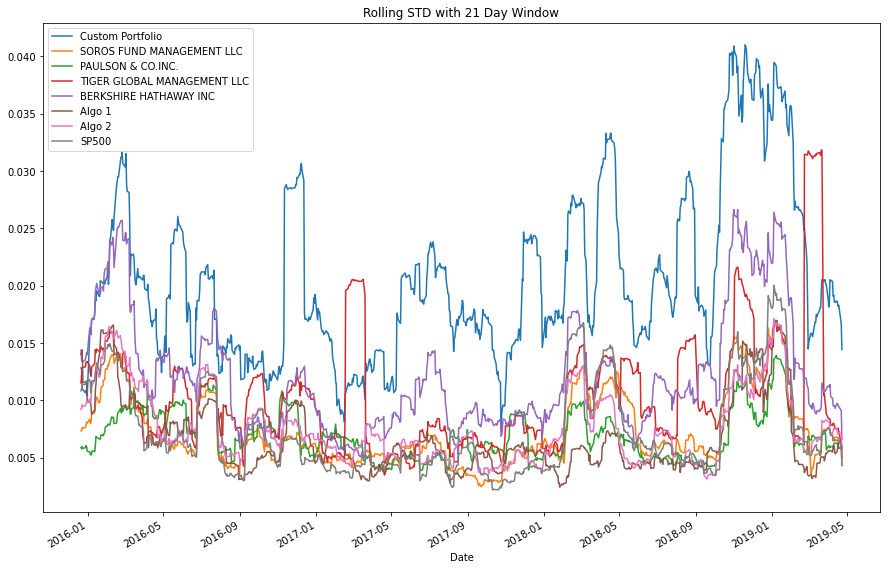

In [328]:
# Calculate rolling standard deviation
combined_portfolios.rolling(window=21).std().plot(figsize=(15,10), title = 'Rolling STD with 21 Day Window')
# Plot rolling standard deviation


### Calculate and plot the correlation

In [313]:
# Calculate and plot the correlation
combined_correlation = combined_portfolios.corr()
combined_correlation

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Custom Portfolio,1.000000,0.584808,0.421164,0.311297,0.640666,0.161181,0.573307,0.614601
SOROS FUND MANAGEMENT LLC,0.584808,1.000000,0.683237,0.523388,0.749374,0.289244,0.818950,0.830919
PAULSON & CO.INC.,0.421164,0.683237,1.000000,0.401221,0.524743,0.255473,0.676496,0.668020
TIGER GLOBAL MANAGEMENT LLC,0.311297,0.523388,0.401221,1.000000,0.386463,0.144102,0.465698,0.584962
BERKSHIRE HATHAWAY INC,0.640666,0.749374,0.524743,0.386463,1.000000,0.266228,0.684621,0.759118
Algo 1,0.161181,0.289244,0.255473,0.144102,0.266228,1.000000,0.279317,0.264222
Algo 2,0.573307,0.818950,0.676496,0.465698,0.684621,0.279317,1.000000,0.858877
SP500,0.614601,0.830919,0.668020,0.584962,0.759118,0.264222,0.858877,1.000000


<AxesSubplot:>

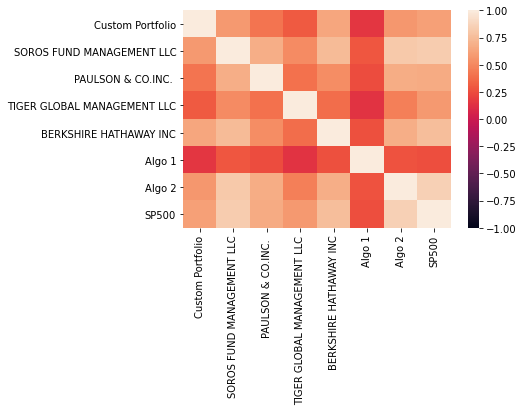

In [317]:
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

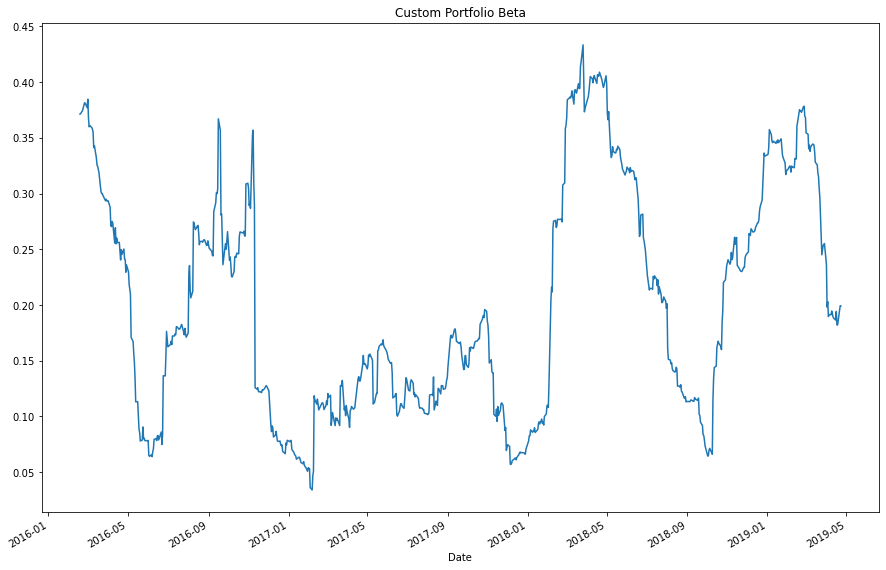

In [321]:
# Calculate and plot Beta
roll_variance = combined_portfolios['Custom Portfolio'].rolling(window=60).var()
roll_covariance = combined_portfolios['Custom Portfolio'].rolling(window=60).cov(combined_portfolios['SP500'])
roll_beta = roll_covariance / roll_variance
roll_beta.plot(figsize=(15, 10), title = 'Custom Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [329]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_custom = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios_custom

Custom Portfolio               1.374030
SOROS FUND MANAGEMENT LLC      0.397592
PAULSON & CO.INC.             -0.501992
TIGER GLOBAL MANAGEMENT LLC   -0.206636
BERKSHIRE HATHAWAY INC         0.686875
Algo 1                         1.444522
Algo 2                         0.695618
SP500                          0.835592
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

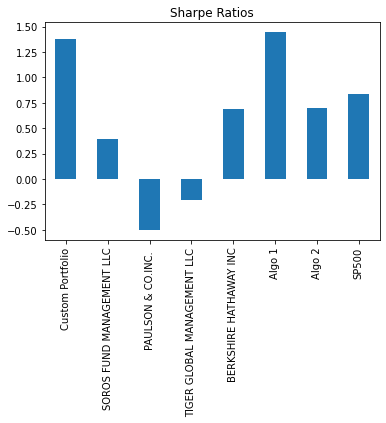

In [330]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot(kind='bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [ ]:
### My custom portfolio out performed the marjority of portfolios. However, the Algo 1 portfolio nearly outeprformed mine. My custom protfolio is the most volatile of the group and is most closely correlated to the Algo 1 portfolio.  